In [1]:
#step1: importing the libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [12]:
#import dataset
from sklearn.datasets import load_iris
data,y = load_iris(return_X_y = True)

In [17]:
df

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
x = df.iloc[::-1].values
y = df.iloc[:,4].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
y = pd.DataFrame(data = y,columns = ["Target"])
df1 =pd.DataFrame(data = data,columns = ["sepal_length","sepal_width","petal_length","petal_width"])
df = pd.concat([df1,y],axis = 1)
df

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


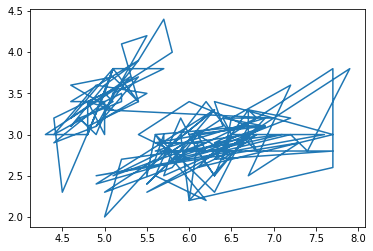

In [4]:
plt.plot(df['sepal_length'],df['sepal_width'])


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

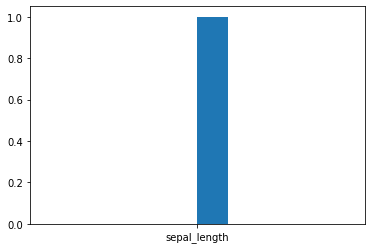

In [5]:
plt.hist("sepal_length")

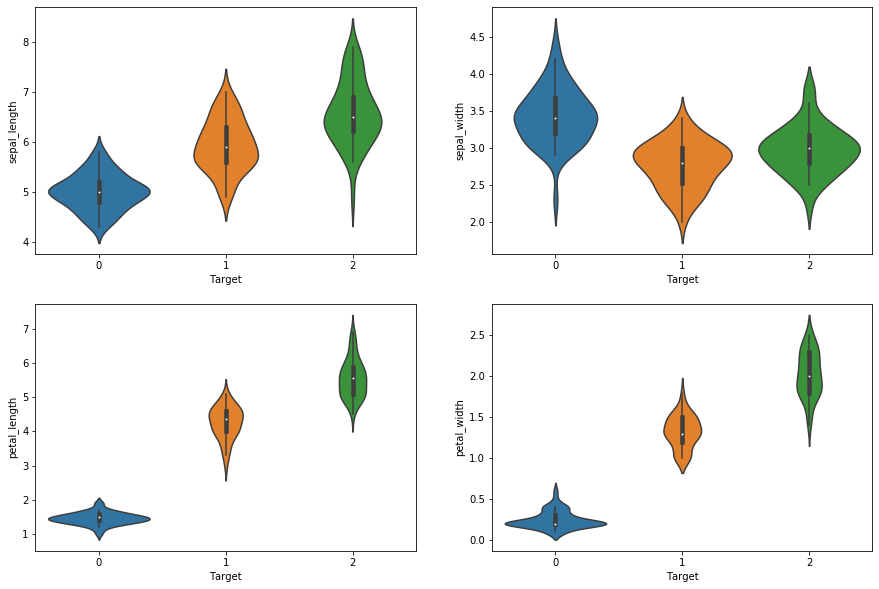

In [6]:
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
sns.violinplot(x ='Target',y ='sepal_length',data = df)
plt.subplot(2,2,2)
sns.violinplot(x ='Target',y ='sepal_width',data = df)
plt.subplot(2,2,3)
sns.violinplot(x ='Target',y ='petal_length',data = df)
plt.subplot(2,2,4)
sns.violinplot(x ='Target',y ='petal_width',data = df)

In [7]:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

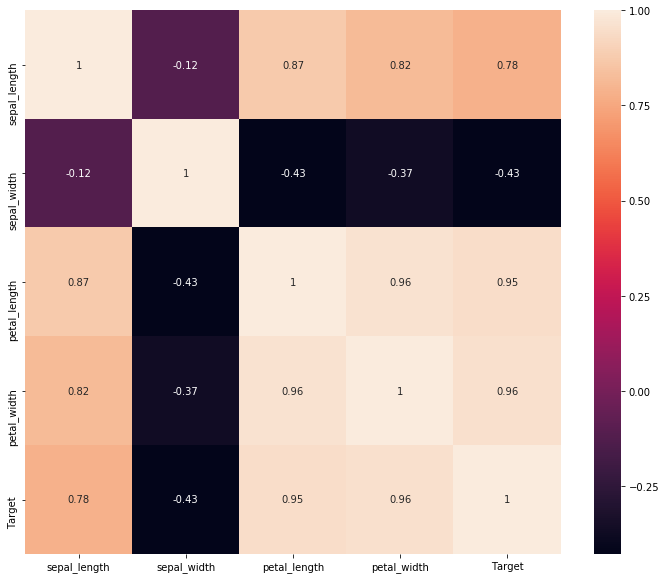

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot = True)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 79)

In [24]:
x_train.shape,y_train.shape

((105, 5), (105,))

In [51]:
#SVM
model = svm.SVC()
model.fit(x_train,y_train)
y = model.predict(x_test)
acc = metrics.accuracy_score(y_test,y)
acc
print(metrics.classification_report(y_test,y))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [52]:
#Logistics Regression
model = LogisticRegression()
model.fit(x_train,y_train)
y = model.predict(x_test)
acc = metrics.accuracy_score(y_test,y)
acc
print(metrics.classification_report(y_test,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [53]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y = model.predict(x_test)
acc = metrics.accuracy_score(y_test,y)
acc
print(metrics.classification_report(y_test,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [54]:
#knn
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)
y = model.predict(x_test)
acc = metrics.accuracy_score(y_test,y)
acc
print(metrics.classification_report(y_test,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



([<matplotlib.axis.XTick at 0x23dbbf53388>,
 <a list of 10 Text xticklabel objects>)

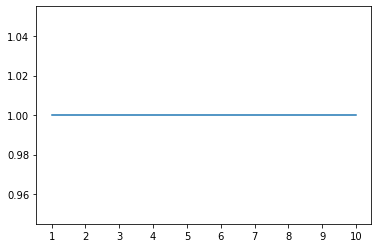

In [37]:
a_index = list(range(1,11))
a = pd.Series()
x = [1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=2)
    model.fit(x_train,y_train)
    y = model.predict(x_test)
    a =a.append(pd.Series(metrics.accuracy_score(y_test,y)))
plt.plot(a_index,a)
plt.xticks(x)

In [56]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y = model.predict(x_test)
acc = metrics.accuracy_score(y_test,y)
acc
print(metrics.classification_report(y_test,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023DBB5F4AC8>,
      dtype=object)

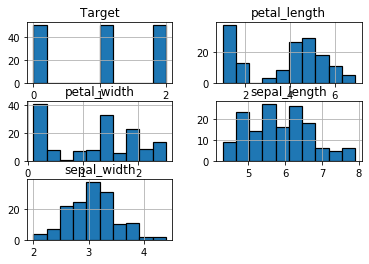

In [39]:
df.hist(edgecolor = 'black',linewidth = 1.2)

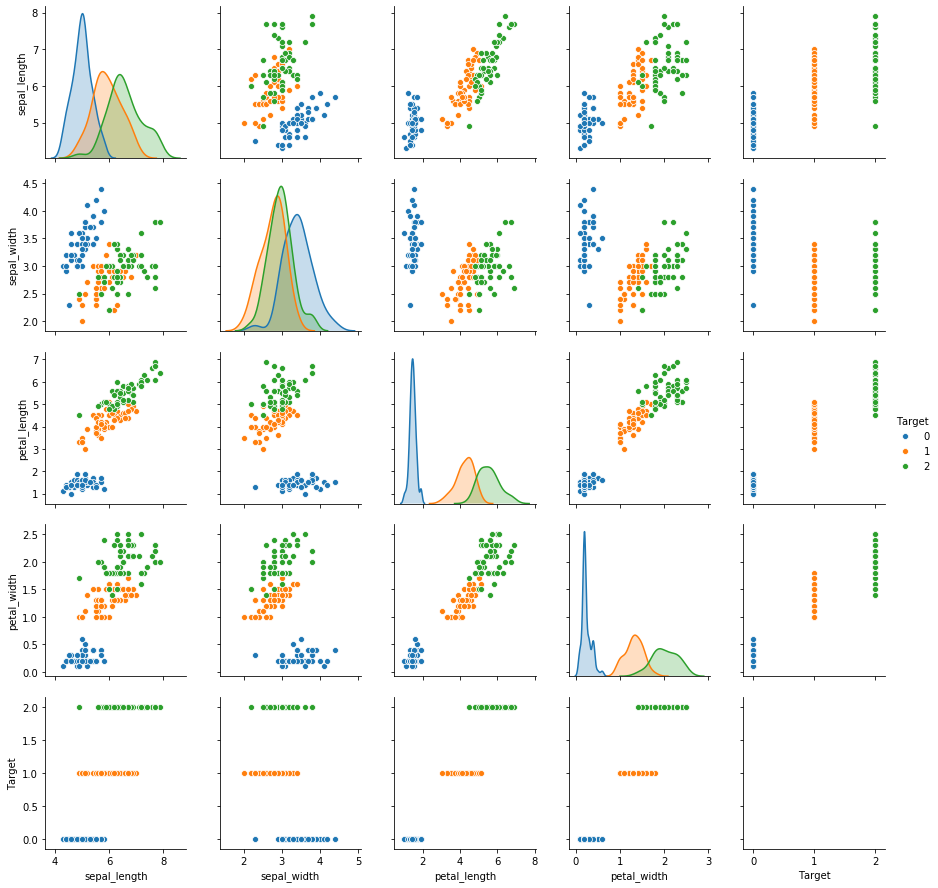

In [45]:
sns.pairplot(df,hue = 'Target')

In [58]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [60]:
#Adaboost
model = AdaBoostClassifier()
model.fit(x_train,y_train)
y = model.predict(x_test)
acc = metrics.accuracy_score(y_test,y)
print(metrics.classification_report(y_test,y))
acc

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



1.0

In [61]:
#Gradient_Boosting
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
y = model.predict(x_test)
acc = metrics.accuracy_score(y_test,y)
print(metrics.classification_report(y_test,y))
acc

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



1.0

In [62]:
#Random_Forest_Classifer
model = RandomForestClassifier()
model.fit(x_train,y_train)
y = model.predict(x_test)
acc = metrics.accuracy_score(y_test,y)
print(metrics.classification_report(y_test,y))
acc

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



1.0

In [63]:
#Bagging
model = BaggingClassifier()
model.fit(x_train,y_train)
model.predict(x_test)
acc = metrics.accuracy_score(y_test,y)
print(metrics.classification_report(y_test,y))
acc

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



1.0

In [65]:
#tree_classifier
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
y = model.predict(x_test)
acc = metrics.accuracy_score(y_test,y)
print(metrics.classification_report(y_test,y))
acc

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



1.0